<a href="https://colab.research.google.com/github/NadeemMughal/Langgraph_Panaversity_Urdu/blob/main/Langgraph_Chatbot_Booking_Appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install langchain_google_genai langchain langgraph langchain_core langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.2/138.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.9 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-1.5-pro', api_key= gemini_api_key, max_output_tokens=1024)
llm

ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), max_output_tokens=1024, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7e88d145faf0>, default_metadata=())

In [ ]:
from langgraph.graph import END, START, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode

In [ ]:
class State(MessagesState):
  pass

In [ ]:
def add(a: float, b: float) -> float:
    """
    Adds two numbers together.

    Args:
        a (float): The first number.
        b (float): The second number.

    Returns:
        float: The sum of the two numbers.
    """
    return a + b

def subtract(a: float, b: float) -> float:
    """
    Subtracts the second number from the first.

    Args:
        a (float): The first number.
        b (float): The second number.

    Returns:
        float: The result of the subtraction.
    """
    return a - b

def multiply(a: float, b: float) -> float:
    """
    Multiplies two numbers together.

    Args:
        a (float): The first number.
        b (float): The second number.

    Returns:
        float: The product of the two numbers.
    """
    return a * b


In [ ]:
# Bind the functions for use in langgraph
from langchain_core.tools import tool

tools = [add, subtract, multiply]

llm_with_tools = llm.bind_tools(tools)



#bound_tools = bind_tools[add, subtract, multiply]

# Verify that the tools are bound
#for tool_name in bound_tools:
 #   print(f"Tool '{tool_name}' has been successfully bound.")


In [ ]:
from langchain_core.messages import AnyMessage,SystemMessage
sys_msg = SystemMessage(content= 'You are a helpful assistant of user queries.')


def chatbot(state: MessagesState) -> MessagesState:
  return {'messages': [llm_with_tools.invoke([sys_msg] +state['messages'])] }

In [ ]:
from langgraph.prebuilt import ToolNode


# Build Grafrom langgraph.prebuilt import tools_conditionph
builder: StateGraph = StateGraph(state_schema=MessagesState)
builder.add_node("ChatBot-LLM", llm_with_tools)
builder.add_node("tools", ToolNode(tools))



In [ ]:
from langgraph.prebuilt import tools_condition
# Logic'
builder.add_edge(START, "ChatBot-LLM")
builder.add_conditional_edges("ChatBot-LLM", tools_condition)

builder.add_edge("tools", "ChatBot-LLM")
builder.add_edge("ChatBot-LLM", END)


In [ ]:
from langgraph.graph.state import CompiledStateGraph
graph: CompiledStateGraph = builder.compile()

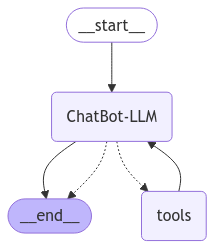

In [ ]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))


## Testing

In [ ]:
# # Chat state to track messages
# class ChatState:
#     def __init__(self):
#         self.history = []  # Store history of interactions
#         self.messages = []  # Initialize messages list

#     def add_to_history(self, question, answer):
#         self.history.append({"question": question, "answer": answer})

#     def get_history(self):
#         return self.history


# # Chatbot function
# def chatbot(state: ChatState) -> ChatState:
#     user_question = state.messages[-1]["content"]
#     response = llm_with_tools.invoke([sys_msg] + state.messages)
#     answer = response["content"]

#     # Update history
#     state.add_to_history(user_question, answer)

#     # Add the response to messages with the 'assistant' role
#     state.messages.append({"role": "assistant", "content": answer})

#     return state


In [ ]:
# # Simulate chatbot interaction
# state = ChatState()
# while True:
#     user_input = input("You: ")
#     if user_input.lower() in ["exit", "quit"]:
#         print("Exiting the chatbot. Here's your history:")
#         for interaction in state.get_history():
#             print(f"Q: {interaction['question']}\nA: {interaction['answer']}")
#         break

#     # Add user message to state with the 'user' role
#     state.messages.append({"role": "user", "content": user_input})

#     # Get chatbot response
#     state = chatbot(state)

#     # Display response
#     print(f"Bot: {state.messages[-1]['content']}")

You: What is 2+2?


TypeError: 'AIMessage' object is not subscriptable

In [ ]:
# # Chat state to track messages
# class ChatState:
#     def __init__(self):
#         self.history = []  # Store history of interactions
#         self.messages = []  # Initialize messages list

#     def add_to_history(self, question, answer):
#         self.history.append({"question": question, "answer": answer})

#     def get_history(self):
#         return self.history


# # Chatbot function
# def chatbot(state: ChatState) -> ChatState:
#     user_question = state.messages[-1]["content"]

#     # Use the LLM with tools to get a response
#     response = llm_with_tools.invoke([sys_msg] + state.messages)
#     answer = response.content  # Extract the content from AIMessage

#     # Update history
#     state.add_to_history(user_question, answer)

#     # Add the response to messages with the 'assistant' role
#     state.messages.append({"role": "assistant", "content": answer})

#     return state


# Simulate chatbot interaction
state = ChatState()
while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Exiting the chatbot. Here's your history:")
        for interaction in state.get_history():
            print(f"Q: {interaction['question']}\nA: {interaction['answer']}")
        break

    # Add user message to state with the 'user' role
    state.messages.append({"role": "user", "content": user_input})

    # Get chatbot response
    state = chatbot(MessagesState)

    # Display response
    print(f"Bot: {state.messages[-1]['content']}")


You: hi


TypeError: can only concatenate list (not "types.GenericAlias") to list

In [ ]:
# install from PyPI
!pip install openai

In [ ]:
# from google.colab import userdata
# OPENAI_API_KEY = userdata.get('OPEN_API_KEY')

In [ ]:
# import openai

# # Initialize the OpenAI client with your API key
# openai.api_key = OPENAI_API_KEY # Make sure OPENAI_API_KEY is defined and contains your key

# # Now you can create the completion
# # Use openai.chat.completions.create instead of openai.ChatCompletion.create
# response = openai.chat.completions.create(
#     model="gpt-4o-mini",  # Use "gpt-4" or "gpt-4-turbo" based on your requirements
#     messages=[
#         {"role": "system", "content": "You are a helpful assistant."},
#         {"role": "user", "content": "Hello, how can I use OpenAI models instead of Google Gemini?"}
#     ],
#     max_tokens=1024
# )

# # Print the response
# print(response.choices[0].message.content) # Access content using . instead of []

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

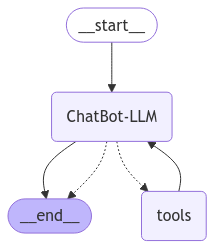

In [ ]:
# -*- coding: utf-8 -*-
"""Langgraph-llm-With-Tool-Node.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/18Pz3UyFN87OAQsYEmgVTrhW9PNv2IZ2M
"""

#pip install langchain_google_genai langchain langgraph langchain_core langchain_community

# from google.colab import userdata
# gemini_api_key = userdata.get('GEMINI_API_KEY')

# from langchain_google_genai import ChatGoogleGenerativeAI
# llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash', api_key=gemini_api_key, max_output_tokens=1024)

from langgraph.graph import END, START, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode
from langchain_core.messages import AnyMessage, SystemMessage, BaseMessage
from typing import Sequence, Annotated

class AgentState(MessagesState):
    """
    AgentState extends MessagesState to maintain a message history.
    The add_messages function ensures new messages are appended to the history.
    """
    messages: Annotated[Sequence[BaseMessage], "add_messages"]

# Bind the functions for use in langgraph
from langchain_core.tools import tool
from langchain_core.tools import tool

@tool
def add(a: float, b: float) -> float:
    """it take two float numbers in arguments for adding.

    Args:
        a (float): The first number.
        b (float): The second number.
    Returns:
        float: The sum of the two numbers.
    """
    print(f"add() called with parameters: a={a}, b={b}")
    return a + b

@tool
def subtract(a: float, b: float) -> float:
    """It takes two float numbers in arguments for subtracting.
    Args:
        a (float): The first number.
        b (float): The second number.
    Returns:
        float: The difference or subtraction of the two numbers.
    """
    print(f"subtract() called with parameters: a={a}, b={b}")
    return a - b

@tool
def multiply(a: float, b: float) -> float:
    """It takes two float numbers in arguments for multiplying.
    Args:
        a (float): The first number.
        b (float): The second number.
    Returns:
        float: The product of the two numbers.
    """
    print(f"multiply() called with parameters: a={a}, b={b}")
    return a * b
# Define a helper function to get the current time in Pakistan
@tool
def get_current_time_in_pakistan() -> str:
    """Fetches the current date and time in Pakistan Standard Time (PST).

    Returns:
        str: The current date and time in Pakistan formatted as 'YYYY-MM-DD HH:MM:SS'.
    """
    pakistan_tz = pytz.timezone('Asia/Karachi')
    current_time = datetime.now(pakistan_tz)
    formatted_time = current_time.strftime('%Y-%m-%d %H:%M:%S')
    print(f"get_current_time_in_pakistan() called, returning: {formatted_time}")
    return formatted_time



tools = [add, multiply, subtract,get_current_time_in_pakistan]
llm_with_tools = llm.bind_tools(tools)

# System message for the LLM
sys_msg = SystemMessage(content='sys_msg = SystemMessage(content="You are a helpful assistant  that can answer general queries and perform general calculations. Use the tools available for general operations.")')

def chatbot(state: AgentState) -> AgentState:
    """
    Handles user interaction by appending new messages to the state
    and invoking the LLM with the updated state.
    """
    response = llm_with_tools.invoke([sys_msg] + state['messages'])
    state['messages'].append(response)
    return state

# Build the StateGraph
builder: StateGraph = StateGraph(state_schema=AgentState)

# Add nodes and tools
builder.add_node("ChatBot-LLM", llm_with_tools)
builder.add_node("tools", ToolNode(tools))

# Define logic and connections
from langgraph.prebuilt import tools_condition
builder.add_edge(START, "ChatBot-LLM")
builder.add_conditional_edges("ChatBot-LLM", tools_condition)
builder.add_edge("tools", "ChatBot-LLM")
builder.add_edge("ChatBot-LLM", END)

# Compile the graph
from langgraph.graph.state import CompiledStateGraph
graph: CompiledStateGraph = builder.compile()

# Visualize the graph
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
print(llm)

model='models/gemini-1.5-pro' google_api_key=SecretStr('**********') max_output_tokens=1024 client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7e88d145faf0> default_metadata=()


In [ ]:
# print(f"Tools registered: {llm_with_tools.tools}")
print(f"Available tools: {tools}")  # List of tool functions
# llm_with_tools = llm.bind_tools(tools)


Available tools: [StructuredTool(name='add', description='it take two float numbers in arguments for adding.\n\n    Args: \n        a (float): The first number.\n        b (float): The second number.\n    Returns:\n        float: The sum of the two numbers.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x7e88cf396a70>), StructuredTool(name='multiply', description='It takes two float numbers in arguments for multiplying.\n    Args:\n        a (float): The first number.\n        b (float): The second number.\n    Returns:\n        float: The product of the two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x7e88cf396560>), StructuredTool(name='subtract', description='It takes two float numbers in arguments for subtracting.\n    Args:\n        a (float): The first number.\n        b (float): The second number.\n    Returns:\n        float: The difference or subtraction of the two numbers.', args_schem

In [ ]:
# from langchain_core.messages import AIMessage, HumanMessage

# def invoke_and_process(llm_with_tools, input_message):
#     # Invoke the tool
#     response = llm_with_tools.invoke([input_message])

#     # Check if there's a tool call in the response
#     tool_calls = response.additional_kwargs.get("function_call", None)
#     if tool_calls:
#         # Parse the arguments and call the corresponding tool
#         tool_name = tool_calls["name"]
#         tool_args = tool_calls["arguments"]
#         tool_args = eval(tool_args)  # Convert arguments from JSON string to dictionary

#         # Find and call the tool
#         tool_result = None
#         for tool in tools:
#             if tool.name == tool_name:
#                 tool_result = tool.func(**tool_args)
#                 break

#         # Inject the tool result into the AIMessage content
#         response.content = f"The result of {tool_name} is {tool_result}."

#     return response

# # Example usage
# human_message = HumanMessage(content="What is 2 + 2?")
# response = invoke_and_process(llm_with_tools, human_message)
# print(response.content)


In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

llm_with_tools.invoke([HumanMessage(content="What is 2 + 2?")])

AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 2.0, "b": 2.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-ef2809fa-fbb6-4fbb-bb21-12ab9f7c97c7-0', tool_calls=[{'name': 'add', 'args': {'a': 2.0, 'b': 2.0}, 'id': '273f2a10-ed35-4785-9323-dea794eb262c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 353, 'output_tokens': 3, 'total_tokens': 356, 'input_token_details': {'cache_read': 0}})

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

# Initialize the chatbot state
state = AgentState(messages=[])

# Function to invoke tools and return a response through LLM
def chatbot(state: AgentState) -> AgentState:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    # Invoke the LLM with the current state
    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])

    # Check if a tool was called
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        # Parse tool call details
        tool_name = tool_calls["name"]
        tool_args = tool_calls["arguments"]
        tool_args = eval(tool_args)  # Convert arguments from JSON string to dictionary

        # Execute the tool
        tool_result = None
        for tool in tools:
            if tool.name == tool_name:
                tool_result = tool.func(**tool_args)
                break

        # Create a message with the tool result and reinvoke the LLM
        tool_result_message = HumanMessage(
            content=f"The tool '{tool_name}' calculated the result: {tool_result}. "
                    f"Please craft a natural language response for the user."
        )
        final_response = llm_with_tools.invoke([sys_msg] + state['messages'] + [tool_result_message])

        # Append the final response to the state
        state['messages'].append(final_response)
    else:
        # If no tool was called, append the original response
        state['messages'].append(llm_response)

    return state

# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: what is time


ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

In [ ]:
# def parse_tool_request(user_input):
#     """
#     Check if the user input is a tool request and extract tool name and arguments.
#     Returns:
#         tuple: (tool_name, arguments) or (None, None) if no tool is requested.
#     """
#     try:
#         # Example: User input format: "add 5 3"
#         parts = user_input.strip().split()
#         if len(parts) >= 3:
#             tool_name = parts[0].lower()
#             args = list(map(float, parts[1:]))
#             if tool_name in ['add', 'subtract', 'multiply']:
#                 return tool_name, args
#         return None, None
#     except ValueError:
#         return None, None


# def chatbot(state: AgentState) -> AgentState:
#     """
#     Handles user interaction by appending new messages to the state,
#     invoking tools if needed, and generating a natural language response through LLM.
#     """
#     # Get the latest user message
#     user_message = state['messages'][-1]

#     # Check if the user message triggers a tool
#     tool_name, tool_args = parse_tool_request(user_message.content)
#     if tool_name:
#         # Find and invoke the tool
#         tool_result = None
#         for tool in tools:
#             if tool.name == tool_name:
#                 tool_result = tool.func(*tool_args)
#                 break

#         # Create a response with the tool result
#         tool_result_message = HumanMessage(
#             content=f"The tool '{tool_name}' calculated the result: {tool_result}. "
#                     f"Please craft a natural language response for the user."
#         )
#         final_response = llm_with_tools.invoke([sys_msg] + state['messages'] + [tool_result_message])

#         # Append the tool result and final response to the state
#         state['messages'].append(AIMessage(content=f"Result: {tool_result}"))
#         state['messages'].append(final_response)
#     else:
#         # Standard LLM invocation if no tool is needed
#         llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])
#         state['messages'].append(llm_response)

#     return state


# # Function to simulate a chatbot session
# def chatbot_test():
#     print("Chatbot is ready. Type 'exit' to quit.")
#     while True:
#         user_input = input("You: ")
#         if user_input.lower() == 'exit':
#             print("Chatbot: Goodbye!")
#             break

#         # Append user input as a HumanMessage to the state
#         state['messages'].append(HumanMessage(content=user_input))

#         # Get the chatbot response
#         updated_state = chatbot(state)

#         # Extract and print the latest AI response
#         ai_response = updated_state['messages'][-1]
#         if isinstance(ai_response, AIMessage):
#             print(f"Chatbot: {ai_response.content}")
#         else:
#             print("Chatbot: Sorry, something went wrong.")


# # Start the chatbot test
# chatbot_test()


Chatbot is ready. Type 'exit' to quit.
You: what is 2+2?
Chatbot: 2 + 2 = 4
You: what is 34567+34567?
Chatbot: 34567 + 34567 = 69134
You: multiply 3 into 3?
Chatbot: 3 multiplied by 3 is 9.
You: what is the current date?
Chatbot: I do not have access to real-time information, including the current date.  To get the current date, you should check a clock or calendar on your device.


KeyboardInterrupt: Interrupted by user

In [ ]:
wh# Test the tools using structured input
print(add.invoke({"a": 2, "b": 2}))        # Should return 4
print(subtract.invoke({"a": 5, "b": 3}))   # Should return 2
print(multiply.invoke({"a": 3, "b": 4}))   # Should return 12


4.0
2.0
12.0


# New


In [ ]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Ahsan GEmini API Key
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API-KEY')

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192",api_key=groq_api_key)

# llm = ChatGroq(
#     model="mixtral-8x7b-32768",
#     temperature=0,
#     max_tokens=None,
#     timeout=None,
#     max_retries=2,
#     # other params...
# )

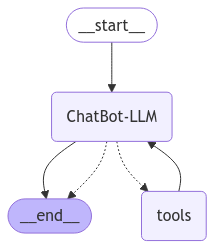

In [ ]:
from langgraph.graph import END, START, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode
from langchain_core.messages import AnyMessage, SystemMessage, BaseMessage
from typing import Sequence, Annotated
from datetime import datetime
import pytz

class AgentState(MessagesState):
    """
    AgentState extends MessagesState to maintain a message history.
    The add_messages function ensures new messages are appended to the history.
    """
    messages: Annotated[Sequence[BaseMessage], "add_messages"]

# Define helper functions for arithmetic operations
from typing import Dict

@tool
def haircut_service(style: str = "classic") -> Dict[str, str]:
    """Provides a haircut service and returns the price and time required.

    Args:
        style (str): The desired haircut style (e.g., 'classic', 'fade', 'modern').

    Returns:
        Dict[str, str]: A dictionary containing the price and estimated time for the haircut service.
    """
    price = "1500 PKR"
    time = "30 minutes"
    result = {"price": price, "time": time}
    print(f"haircut_service(style='{style}') called, returning: {result}")
    return result


@tool
def beard_grooming(beard_style: str = "trim") -> Dict[str, str]:
    """Performs beard grooming and returns the price and time required.

    Args:
        beard_style (str): The desired grooming style (e.g., 'trim', 'shave', 'full styling').

    Returns:
        Dict[str, str]: A dictionary containing the price and estimated time for the beard grooming service.
    """
    price = "1000 PKR"
    time = "20 minutes"
    result = {"price": price, "time": time}
    print(f"beard_grooming(beard_style='{beard_style}') called, returning: {result}")
    return result


@tool
def face_cleaning_service() -> Dict[str, str]:
    """Provides a face cleaning service and returns the price and time required.

    Returns:
        Dict[str, str]: A dictionary containing the price and estimated time for the face cleaning service.
    """
    price = "1200 PKR"
    time = "25 minutes"
    result = {"price": price, "time": time}
    print(f"face_cleaning_service() called, returning: {result}")
    return result


@tool
def facial_service(type_of_facial: str = "hydrating") -> Dict[str, str]:
    """Performs a facial treatment and returns the price and time required.

    Args:
        type_of_facial (str): The type of facial to provide (e.g., 'hydrating', 'anti-aging', 'acne treatment').

    Returns:
        Dict[str, str]: A dictionary containing the price and estimated time for the facial service.
    """
    price = "2000 PKR"
    time = "45 minutes"
    result = {"price": price, "time": time}
    print(f"facial_service(type_of_facial='{type_of_facial}') called, returning: {result}")
    return result


@tool
def hair_spa_service() -> Dict[str, str]:
    """Provides a hair spa treatment and returns the price and time required.

    Returns:
        Dict[str, str]: A dictionary containing the price and estimated time for the hair spa service.
    """
    price = "2500 PKR"
    time = "60 minutes"
    result = {"price": price, "time": time}
    print(f"hair_spa_service() called, returning: {result}")
    return result


@tool
def manicure_pedicure_service(option: str = "both") -> Dict[str, str]:
    """Provides manicure and/or pedicure services and returns the price and time required.

    Args:
        option (str): The desired service option ('manicure', 'pedicure', or 'both').

    Returns:
        Dict[str, str]: A dictionary containing the price and estimated time for the selected service(s).
    """
    if option == "manicure":
        price = "1500 PKR"
        time = "30 minutes"
    elif option == "pedicure":
        price = "1800 PKR"
        time = "35 minutes"
    else:  # both
        price = "3000 PKR"
        time = "60 minutes"
    result = {"price": price, "time": time}
    print(f"manicure_pedicure_service(option='{option}') called, returning: {result}")
    return result

# Define a helper function to get the current time in Pakistan
@tool
def get_current_time_in_pakistan() -> str:
    """Fetches the current date and time in Pakistan Standard Time (PST).

    Returns:
        str: The current date and time in Pakistan formatted as 'YYYY-MM-DD HH:MM:SS'.
    """
    pakistan_tz = pytz.timezone('Asia/Karachi')
    current_time = datetime.now(pakistan_tz)
    formatted_time = current_time.strftime('%Y-%m-%d %H:%M:%S')
    print(f"get_current_time_in_pakistan() called, returning: {formatted_time}")
    return formatted_time

# Bind the functions for use in langgraph


tools = [haircut_service, beard_grooming, face_cleaning_service, facial_service, hair_spa_service, manicure_pedicure_service, get_current_time_in_pakistan]
llm_with_tools = llm.bind_tools(tools)

# System message for the LLM
sys_msg = SystemMessage(content="""
You are a highly knowledgeable and helpful assistant specializing in men's grooming services.
Your primary role is to provide accurate, detailed, and user-friendly information about a range of men's grooming services, including but not limited to haircuts, beard grooming, face cleaning, facials, hair spa treatments, and manicure/pedicure services.

You can offer:

Service Descriptions: Provide clear and concise explanations of each grooming service, detailing the processes and their benefits.
Price Ranges: Offer accurate price estimates based on the type of service, customization, and location-specific rates if applicable.
Time Estimates: Give realistic time durations for each service to help users plan their schedules.
Recommendations: Suggest services based on user needs, preferences, or occasions (e.g., special events, regular upkeep).
Guidelines for Interaction:
Clarity and Detail: Always explain the requested information clearly and thoroughly, avoiding jargon unless necessary.
Customization: Tailor your responses to the user's specific needs, such as hair type, skin condition, or preferred style.
Engagement: Maintain a polite, professional, and approachable tone, ensuring user comfort and satisfaction.
Available Functions for Responses:
haircut_service

Provide information about haircut styles, trends, and maintenance.
Offer price ranges and time estimates for various haircut options (e.g., trims, fades, layer cuts).
beard_grooming

Explain beard grooming services such as trimming, shaping, and styling.
Include advice on beard care products and maintenance routines.
face_cleaning_service

Describe face cleaning procedures, including exfoliation, cleansing, and moisturizing.
Highlight benefits like improved skin texture and reduced acne or blackheads.
facial_service

Outline different types of facials (e.g., anti-aging, hydration, brightening).
Provide insights into the steps involved and the skin concerns they address.
hair_spa_service

Detail the hair spa process, such as deep conditioning, scalp treatments, and massages.
Emphasize benefits like strengthened hair, reduced hair fall, and a healthy scalp.
manicure_pedicure_service

Explain the importance of hand and foot care, including nail trimming, cuticle care, and massages.
Highlight benefits like improved hygiene and relaxation.
Response Requirements:
Accurate Details: Always verify prices and durations when possible.
Relevance: Avoid unnecessary information; focus solely on the requested service.
User-Centric Approach: Ensure responses are actionable and easy to understand.
Tools and Operations: When a tool or specific operation is required, clearly outline its role in addressing the query.
Example Interaction:

User: "How much does a haircut cost, and how long will it take?"
Assistant:
"Haircut services generally range between $100 and $150, depending on the style and salon. A basic haircut typically takes 30 minutes. For trendy or complex styles, it may take up to 1 hour. If you need details about a specific type of haircut, let me know!"

User: "What are the benefits of a facial?"
Assistant:
"A facial helps cleanse and exfoliate the skin, remove dead skin cells, and treat specific concerns like acne, dryness, or uneven tone. It also promotes relaxation and improves blood circulation, giving your face a fresh and rejuvenated appearance."


""")

def chatbot(state: AgentState) -> AgentState:
    """
    Handles user interaction by appending new messages to the state
    and invoking the LLM with the updated state.
    """
    response = llm_with_tools.invoke([sys_msg] + state['messages'])
    state['messages'].append(response)
    return state

# Build the StateGraph
builder: StateGraph = StateGraph(state_schema=AgentState)

# Add nodes and tools
builder.add_node("ChatBot-LLM", llm_with_tools)
builder.add_node("tools", ToolNode(tools))

# Define logic and connections
from langgraph.prebuilt import tools_condition
builder.add_edge(START, "ChatBot-LLM")
builder.add_conditional_edges("ChatBot-LLM", tools_condition)
builder.add_edge("tools", "ChatBot-LLM")
builder.add_edge("ChatBot-LLM", END)

# Compile the graph
from langgraph.graph.state import CompiledStateGraph
graph: CompiledStateGraph = builder.compile()

# Visualize the graph
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
print(llm)

client=<groq.resources.chat.completions.Completions object at 0x7e88cf772590> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e88cf4a1c90> model_name='llama3-8b-8192' model_kwargs={} groq_api_key=SecretStr('**********')


In [ ]:
from datetime import datetime
import pytz

# Function definition
def get_current_time_in_pakistan() -> str:
    """Fetches the current date and time in Pakistan Standard Time (PST).

    Returns:
        str: The current date and time in Pakistan formatted as 'YYYY-MM-DD HH:MM:SS'.
    """
    pakistan_tz = pytz.timezone('Asia/Karachi')
    current_time = datetime.now(pakistan_tz)
    formatted_time = current_time.strftime('%Y-%m-%d %H:%M:%S')
    print(f"get_current_time_in_pakistan() called, returning: {formatted_time}")
    return formatted_time

# Manual test
current_time_in_pakistan = get_current_time_in_pakistan()
print(f"Current time in Pakistan: {current_time_in_pakistan}")


get_current_time_in_pakistan() called, returning: 2025-01-14 15:27:42
Current time in Pakistan: 2025-01-14 15:27:42


## Correct tool calling

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage
import json
# Initialize the chatbot state
state = AgentState(messages=[])

# Function to invoke tools and return a response through LLM
def chatbot(state: AgentState) -> AgentState:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    # Invoke the LLM with the current state
    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])

    # Append the LLM's response to the state
    state['messages'].append(llm_response)

    # Check if a tool was called
    tool_calls = llm_response.additional_kwargs.get("tool_calls", None)
    if tool_calls:
        for tool_call in tool_calls:
            tool_name = tool_call["function"]["name"]
            tool_args = json.loads(tool_call["function"]["arguments"])  # Safely parse the arguments

            # Find and execute the corresponding tool
            tool_result = None
            for tool in tools:
                if tool.__name__ == tool_name:  # Match tool by function name
                    tool_result = tool(**tool_args)
                    break

            if tool_result:
                # Add the tool result to the state and reinvoke the LLM
                tool_result_message = HumanMessage(
                    content=f"The tool '{tool_name}' returned: {tool_result}"
                )
                state['messages'].append(tool_result_message)
                final_response = llm_with_tools.invoke([sys_msg] + state['messages'])
                state['messages'].append(final_response)
            else:
                # Handle case where the tool could not be found or failed
                error_message = HumanMessage(content=f"Error: Tool '{tool_name}' could not be executed.")
                state['messages'].append(error_message)

    return state


# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: manicure


AttributeError: 'StructuredTool' object has no attribute '__name__'

In [ ]:
# Correct Response 👍👌👌👌👌👍👍👍👍👍👍👍👍👍👍👍👍👍👍
from langchain_core.messages import AIMessage, HumanMessage
import json
# Initialize the chatbot state
state = AgentState(messages=[])

# Function to invoke tools and return a response through LLM
def chatbot(state: AgentState) -> AgentState:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    # Invoke the LLM with the current state
    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])

    # Append the LLM's response to the state
    state['messages'].append(llm_response)

    # Check if a tool was called
    tool_calls = llm_response.additional_kwargs.get("tool_calls", None)
    if tool_calls:
        for tool_call in tool_calls:
            tool_name = tool_call["function"]["name"]
            tool_args = json.loads(tool_call["function"]["arguments"])  # Safely parse the arguments

            # Find and execute the corresponding tool
            tool_result = None
            # Iterate through the original list of tools
            for tool in tools:  # This is the change
                if tool.name == tool_name:
                    # Invoke the tool using its 'run' method if available or 'func' otherwise
                    if hasattr(tool, 'run'):  # Check if 'run' method exists
                        tool_result = tool.run(tool_input='tool input', **tool_args)
                    elif hasattr(tool, 'func'):  # Check if 'func' attribute exists
                        tool_result = tool.func(**tool_args)
                    break

            if tool_result:
                # Add the tool result to the state and reinvoke the LLM
                tool_result_message = HumanMessage(
                    content=f"The tool '{tool_name}' returned: {tool_result}"
                )
                state['messages'].append(tool_result_message)
                final_response = llm_with_tools.invoke([sys_msg] + state['messages'])
                state['messages'].append(final_response)
            else:
                # Handle case where the tool could not be found or failed
                error_message = HumanMessage(content=f"Error: Tool '{tool_name}' could not be executed.")
                state['messages'].append(error_message)

    return state


# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: I want to do a manicure.
Chatbot: A manicure sounds like a great idea!

For a manicure, you can choose from a variety of options, including a basic manicure, spa manicure, or gel manicure. Here's a brief overview of each:

* Basic Manicure: A classic manicure that includes nail trimming, cuticle care, and a moisturizing treatment. ($15-$25)
* Spa Manicure: A more luxurious option that includes a warm paraffin wax treatment, exfoliating scrub, and a relaxing massage. ($30-$45)
* Gel Manicure: A long-lasting option that uses gel polish to create a glossy finish. ($25-$40)

Which type of manicure sounds appealing to you?
You: basic manicure
Chatbot: A basic manicure is a great option for a quick and relaxing pampering session.

Here's what you can expect from a basic manicure:

* Nail trimming: Your nails will be carefully trimmed to the desired length.
* Cuticle care: The cuticles will be gently pushed back and cleaned to remove any dead skin.


KeyboardInterrupt: Interrupted by user

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

# Initialize the chatbot state
state = AgentState(messages=[])

# Function to invoke tools and return a response through LLM
def chatbot(state: AgentState) -> AgentState:
    """
    Handles user interaction by appending new messages to the state,
    invoking tools if needed, and generating a natural language response through LLM.
    """
    # Invoke the LLM with the current state
    llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])

    # Check if a tool was called
    tool_calls = llm_response.additional_kwargs.get("function_call", None)
    if tool_calls:
        # Parse tool call details
        tool_name = tool_calls["name"]
        tool_args = tool_calls["arguments"]
        tool_args = eval(tool_args)  # Convert arguments from JSON string to dictionary

        # Execute the tool
        tool_result = None
        for tool in tools:
            if tool.name == tool_name:
                tool_result = tool.func(**tool_args)
                break

        # Create a message with the tool result and reinvoke the LLM
        tool_result_message = HumanMessage(
            content=f"The tool '{tool_name}' calculated the result: {tool_result}. "
                    f"Please craft a natural language response for the user."
        )
        final_response = llm_with_tools.invoke([sys_msg] + state['messages'] + [tool_result_message])

        # Append the final response to the state
        state['messages'].append(final_response)
    else:
        # If no tool was called, append the original response
        state['messages'].append(llm_response)

    return state

# Function to simulate a chatbot session
import time

# ... (your existing code) ...

# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]  # The chatbot's response is the last message
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")

        # Introduce a delay (e.g., 1 second) to avoid exceeding rate limits
        time.sleep(1)

# Start the chatbot test
chatbot_test()

Chatbot is ready. Type 'exit' to quit.
You: manicure
Chatbot: 


KeyboardInterrupt: Interrupted by user

### Incorrect tool calling

In [ ]:
def parse_tool_request(user_input):
    """
    Check if the user input matches a tool request and extract the tool name and arguments.
    """
    if "current time" in user_input.lower() or "current date" in user_input.lower():
        return "get_current_time_in_pakistan", []
    try:
        parts = user_input.strip().split()
        if len(parts) >= 3:
            tool_name = parts[0].lower()
            args = list(map(float, parts[1:]))
            if tool_name in ['add', 'subtract', 'multiply']:
                return tool_name, args
    except ValueError:
        pass
    return None, None


def chatbot(state: AgentState) -> AgentState:
    """
    Handles user interaction, checking if a tool is invoked and calling it if necessary.
    """
    # Get the latest user message
    user_message = state['messages'][-1]

    # Check if the user message triggers a tool
    tool_name, tool_args = parse_tool_request(user_message.content)
    if tool_name:
        # Find and invoke the tool
        tool_result = None
        for tool in tools:
            if tool.name == tool_name:
                tool_result = tool.func(*tool_args)
                break

        # Create a response with the tool result
        tool_result_message = AIMessage(
            content=f"The tool '{tool_name}' calculated the result: {tool_result}."
        )
        state['messages'].append(tool_result_message)
    else:
        # Standard LLM invocation if no tool is needed
        llm_response = llm_with_tools.invoke([sys_msg] + state['messages'])
        state['messages'].append(llm_response)

    return state



# Function to simulate a chatbot session
def chatbot_test():
    print("Chatbot is ready. Type 'exit' to quit.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break

        # Append user input as a HumanMessage to the state
        state['messages'].append(HumanMessage(content=user_input))

        # Get the chatbot response
        updated_state = chatbot(state)

        # Extract and print the latest AI response
        ai_response = updated_state['messages'][-1]
        if isinstance(ai_response, AIMessage):
            print(f"Chatbot: {ai_response.content}")
        else:
            print("Chatbot: Sorry, something went wrong.")


# Start the chatbot test
chatbot_test()


Chatbot is ready. Type 'exit' to quit.
You: manicure
Chatbot: 


KeyboardInterrupt: Interrupted by user